In [7]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
data = pd.read_json('ultimate_data_challenge.json')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [8]:
data['last_trip_date'] = pd.to_datetime(data['last_trip_date'])
data['signup_date'] = pd.to_datetime(data['signup_date'])
print('Range of sign up dates is between {} and {}'
     .format(data['signup_date'].min(), data['signup_date'].max()))


Range of sign up dates is between 2014-01-01 00:00:00 and 2014-01-31 00:00:00


In [9]:
data.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)
data['ultimate_black_user'] = data['ultimate_black_user'].astype(int)
data['retained'] = data['retained'].astype(int)
print('Out of {} users, {} were still active in their 6th month.'
     .format(len(data), data['retained'].sum()))

Out of 50000 users, 18804 were still active in their 6th month.


In [10]:
data.corr()['retained']

trips_in_first_30_days    0.210463
avg_rating_of_driver     -0.011653
avg_surge                -0.003333
surge_pct                 0.011797
ultimate_black_user       0.205002
weekday_pct               0.009693
avg_dist                 -0.092780
avg_rating_by_driver     -0.026791
retained                  1.000000
Name: retained, dtype: float64

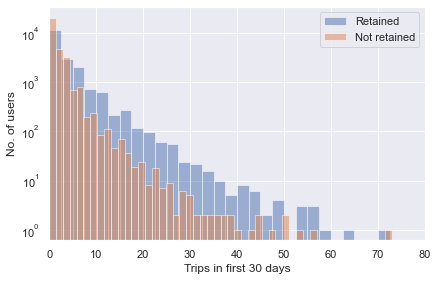

In [11]:
# Visualize some of them.
retained = data.loc[data.retained==1]
not_retained = data.loc[data.retained==0]
_ = plt.hist(retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Retained')
_ = plt.hist(not_retained['trips_in_first_30_days'], bins=50, alpha=0.5, label='Not retained')
_ = plt.xlabel('Trips in first 30 days')
_ = plt.ylabel('No. of users')
_ = plt.xlim([0,80])
_ = plt.yscale('log')
_ = plt.legend()

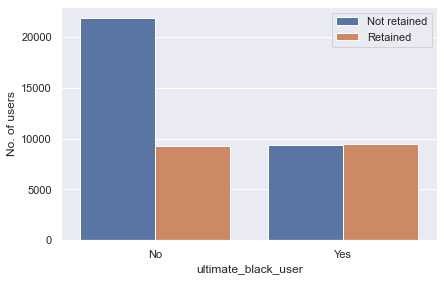

In [12]:
_ = sns.countplot(x='ultimate_black_user', hue='retained', data=data)
_ = plt.legend(['Not retained', 'Retained'])
_ = plt.ylabel('No. of users')
_ = plt.xticks([0,1],['No','Yes'])

In [13]:
# Chi-square test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['ultimate_black_user'], data['retained'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 2100.4182024974366	p = 0.0


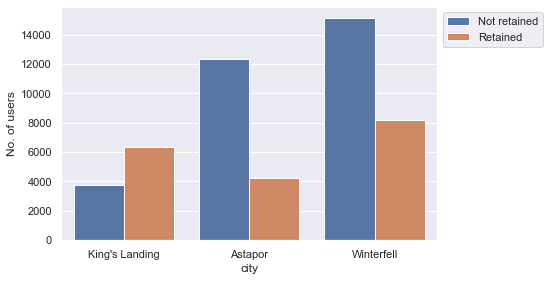

In [14]:
# Visualize the two categorical features, city and phone
_ = sns.countplot(x='city', hue='retained', data=data)
_ = plt.legend(['Not retained', 'Retained'], bbox_to_anchor=(1,1))
_ = plt.ylabel('No. of users')

In [15]:
# Chi-square test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['city'], data['retained'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 3821.5510225559638	p = 0.0


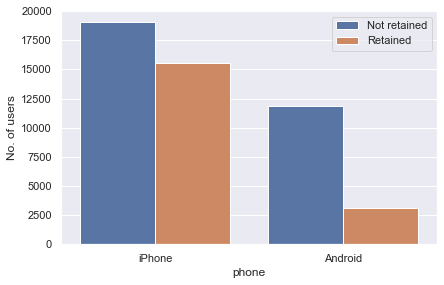

In [16]:
# Phone
_ = sns.countplot(x='phone', hue='retained', data=data)
_ = plt.legend(['Not retained', 'Retained'])
_ = plt.ylabel('No. of users')

In [17]:
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(data['phone'], data['retained'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 2558.3942122674252	p = 0.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  retained                50000 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


In [19]:
data.fillna({'avg_rating_by_driver':data['avg_rating_by_driver'].mean()}, inplace=True)
data.fillna({'avg_rating_of_driver':data['avg_rating_of_driver'].mean()}, inplace=True)
data.dropna(inplace=True)

In [20]:
target = data['retained']
data.drop('retained', axis=1, inplace=True)
data['iphone'] = pd.get_dummies(data['phone'], drop_first=True)
data.drop('phone', axis=1, inplace=True)
data = pd.concat([data, pd.get_dummies(data['city'], drop_first=True)], axis=1)
data.drop('city', axis=1, inplace=True)
# Sclae the features
from sklearn.preprocessing import scale
scaled_data = pd.DataFrame(scale(data))
scaled_data.columns = data.columns
scaled_data.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,iphone,King's Landing,Winterfell
0,0.454159,0.174300,0.112318,0.326417,1.290412,-0.395941,-0.373113,0.497826,0.659081,1.981887,-0.934523
1,-0.600342,0.705065,-0.336789,-0.444014,-0.774946,-0.293477,0.436461,0.497826,-1.517264,-0.504570,-0.934523
2,0.190534,-0.533387,-0.336789,-0.444014,-0.774946,1.054746,-0.884608,0.497826,0.659081,-0.504570,-0.934523
3,1.772286,-0.002622,0.291961,0.556545,1.290412,0.515457,-0.604167,0.273719,0.659081,1.981887,-0.934523
4,3.090412,-0.356465,0.516515,0.146316,-0.774946,0.580172,-0.468357,0.273719,-1.517264,-0.504570,1.070064


In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_data, target, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
clf = LogisticRegression(random_state=42)
params = {
    'C': [1e-5, 1e-4, 0.001, 0.01, 0.1],
    'penalty': ['l1', 'l2']
}
model = GridSearchCV(clf, params, scoring='accuracy')
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best accuracy was', model.best_score_)

Best parameters were {'C': 0.001, 'penalty': 'l2'}
Best accuracy was 0.7186248668738882


In [23]:
# Evaluate model using test sets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
logreg = LogisticRegression(C=0.0001, penalty='l2', random_state=42)
logreg.fit(Xtrain, ytrain)
ypred = logreg.predict(Xtest)
print('Accuracy of test set was {}\n'.format(accuracy_score(ytest, ypred)))
print(classification_report(ytest, ypred))
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
print('True Negative = {}\tFalse Positive = {}\nFalse Negative = {}\tTrue Positive={}'
     .format(tn,fp,fn,tp))

Accuracy of test set was 0.6886541407950971

              precision    recall  f1-score   support

           0       0.68      0.96      0.79      7750
           1       0.78      0.24      0.36      4651

    accuracy                           0.69     12401
   macro avg       0.73      0.60      0.58     12401
weighted avg       0.72      0.69      0.63     12401

True Negative = 7436	False Positive = 314
False Negative = 3547	True Positive=1104


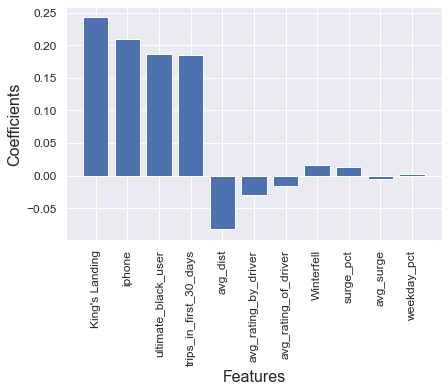

In [24]:
coefs = pd.Series(logreg.coef_.reshape(-1), index=scaled_data.columns)
coefs = coefs[coefs.abs().sort_values(ascending=False).index]
_ = plt.bar(range(len(coefs)), coefs)
_ = plt.xticks(range(len(coefs)), coefs.index, rotation=90)
_ = plt.xlabel('Features', fontsize=16)
_ = plt.ylabel("Coefficients", fontsize=16)
_ = plt.xticks(fontsize=12)
_ = plt.yticks(fontsize=12)

As we can see here, different phone type can have important affect retention rate, as customers might have different user experiences with different phone types.
Trips_in_first_30_days can also postively affect the retention rate, as maybe the more trips customers take, the more they might rely on this service, and more accept it with their finance budget.
People in different city can also affect the retention rate.
Therefore, my recommendation is try to boost retention by giving different type of introductory discounts to new users in the first 30 days to let them get this service as part of their life, so we can increase rentention rate, and try to improve user experience with better app design on using the service no matter with what phone type, which can also improve the retention rate. Also, we might take different actions on people at different cities, we can maybe also do a segementation to see what factors are more important for different cities.
